# **Зачётная работа**.
## **Предмет**:Системы компьютерной математики.
## **Вариант**:34.
### **Преподователь**:Золотых Николай Юрьевич.
### **Выполнил**:Доставалов Семён Евгеньевич.
### **Группа**:3821Б1ПР2.
#### **Цель**:Реализация нулевого метода(метод *Хука-Дживса*) для минимизации многомерных функций,а так же эксперементальное сравнение его с методами первого порядка(метод *градиентного спуска*) и второго порядка (метод *Ньютона*).

**Инициализация библиотек, необходимых для построения графика и корректной работы кода.**

In [1]:
import matplotlib.pyplot as plt #Инициализация библиотек
import copy
import numpy as np
from scipy import linalg
from scipy.optimize import minimize as miniz, rosen, rosen_der, rosen_hess, OptimizeResult as optim
%matplotlib inline

**Инициализация переменных,для обычного расчёта**

In [2]:
x0 = np.array([4,-4]) #Начальная точка
step = 0.000001 #Минимальная длинна шага step>0
epsilon0  = 0.1 #Начальная длинна шага 
delta = 0.1 #Точность 0>delta>1
gamma = 1 #Множитель шага
ps = [x0]

**Создание функций с эксперементальным решением метода Хука-Дживса через модуль Optimize.**

In [3]:
def HJ(func,x0,step=0.000001,epsilon0=0.1,delta=0.1,gamma=1,callback=None,**options):
    fun = rosen(x0)
    nit = 0
    epsilon = epsilon0 #Устанавливаем начальную длинну шага
    x = np.array(x0) #Устанавливаем Х, как начальное решение
    
    while epsilon>step: #Пока длинна шага больше чем, миним.
        xtest = np.zeros(len(x))
        nit += 1
        if callback is not None:
            callback(x)
        for coordinate in range(len(x)): #Исследуем каждое направление
            y = [copy.copy(x) for _ in range(3)] #Находим наименьше из значений функции
            y[0][coordinate]-=epsilon
            y[1][coordinate]+=epsilon
            f_y = [func(y) for y in y]
            min_value = min(f_y)
            xtest[coordinate] = y[f_y.index(min_value)][coordinate] #Достижение минимума
        if all(xtest==x): #Если х совпадает с минимумом,то уменьшаем шаг
            epsilon = delta*epsilon
        else:
            if func(xtest)<func(x+gamma*(xtest-x)):
                x = xtest
            else:
                x = x+gamma*(xtest-x)
    return optim(fun=fun,x=x,nit=nit,succes=(nit>1))

def reporter(p):
    global ps
    ps.append(p)

**Вызов метода Хука-Дживса с функцией Розенброка.**

In [4]:
miniz(rosen, x0, method=HJ, callback=reporter)

    fun: 40009.0
    nit: 13134
 succes: True
      x: array([0.999791, 0.999582])

**Получаем значения вызванной нами функции,где:**

nit - кол-во иттераций.

succes - удалось ли найти минимум(True - да, False - нет).

и само значение x, зависящее от точности,размерности шага.

**Далее мы создаём переменные(координаты) для построения графиков, Розенброка и линейного вида.И само построние графических сред.**

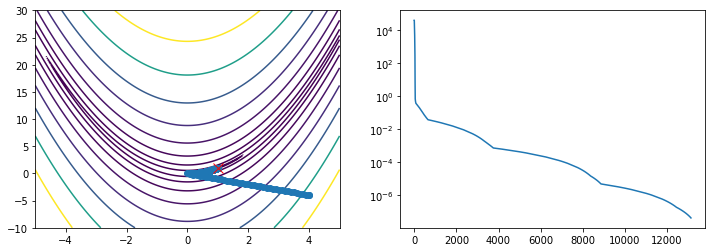

In [5]:
x = np.linspace(-5, 5, 300)
y = np.linspace(-10, 30, 300)
X, Y = np.meshgrid(x, y)
Z = rosen(np.vstack([X.ravel(), Y.ravel()])).reshape((300,300))
ps = np.array(ps)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.contour(X, Y, Z, np.arange(10)**5)
plt.plot(ps[:, 0], ps[:, 1], '-o')
plt.plot(1, 1, color='red', marker='x', markersize=10)
plt.subplot(122)
plt.semilogy(range(len(ps)), rosen(ps.T));

**Благодаря графику справа, можно предположить,что скорость сходимости у данной функции сверхлинейная**

**Создание функции метода градиентого спуска,через тот же модуль Optimize, для эксперементального сравнения с методом Хука-Дживса**

In [6]:
def greedy_min(fun, x0, args=(), maxfev=None, alpha=0.0001,maxiter=100000, tol=1e-10, callback=None, **options):
    bestx = x0
    besty = fun(x0)
    niter = 0
    improved = True
    stop = False

    while improved and not stop and niter < maxiter:
        niter += 1
        step = alpha * rosen_der(bestx)
        bestx = bestx - step

        besty = fun(bestx)

        if linalg.norm(step) < tol:
            improved = False
        if callback is not None:
            callback(bestx)
        if maxfev is not None and funcalls >= maxfev:
            stop = True
            break

    return optim(fun=besty, x=bestx, nit=niter, success=(niter > 1))

**Инициализация переменных и вызов функции метода градиентного спуска с функцией Розенброка**

In [7]:
x0 = np.array([4.0,-4.0])
ps = [x0]

miniz(rosen, x0, method=greedy_min, callback=reporter)

     fun: 3.178542782474229e-05
     nit: 100000
 success: True
       x: array([0.99436668, 0.98874248])

**Данные значение показывают нам,что этот метод за 100 тыс. итераций(задаваемое переменной maxiter)нашёл значение хуже по точности, чем метод Хука-Дживса**

**Всё то же построение графиков для рассмотрения хода решения алгоритма**

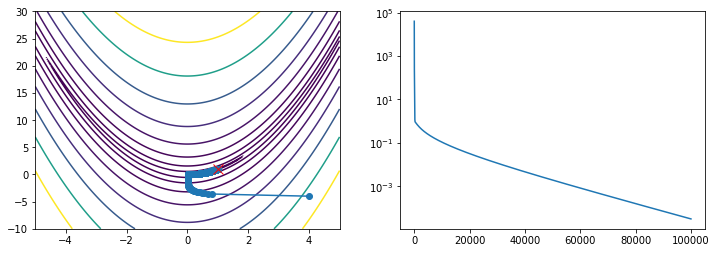

In [8]:
x = np.linspace(-5, 5, 300)
y = np.linspace(-10, 30, 300)
X, Y = np.meshgrid(x, y)
Z = rosen(np.vstack([X.ravel(), Y.ravel()])).reshape((300,300))
ps = np.array(ps)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.contour(X, Y, Z, np.arange(10)**5)
plt.plot(ps[:, 0], ps[:, 1], '-o')
plt.plot(1, 1, color='red', marker='x', markersize=10)
plt.subplot(122)
plt.semilogy(range(len(ps)), rosen(ps.T));

**На графике справа мы видим,что скорость нахождения у данного метода линейная**

**Так же инициализируем переменные и через функцию minimize(miniz) эксперементально рассматриваем как метод Ньютона решит данную задачу**

In [9]:
x0 = np.array([4.0,-4.0])
ps = [x0]

miniz(rosen, x0, method='Newton-CG', jac=rosen_der, hess=rosen_hess, callback=reporter)

     fun: 8.363643402306107e-12
     jac: array([ 0.00093948, -0.00047169])
 message: 'Optimization terminated successfully.'
    nfev: 37
    nhev: 26
     nit: 26
    njev: 37
  status: 0
 success: True
       x: array([0.99999711, 0.99999421])

**В данной графе данных,мы видим,что за 26 итераций,метод Ньютона приблизился к максимальной точности,нежели за большое количество итераций,методы градиентного спуска и Хука-Дживса

**Рассмотрим график,чтобы понять ход решения и сравнить его с предедущими**

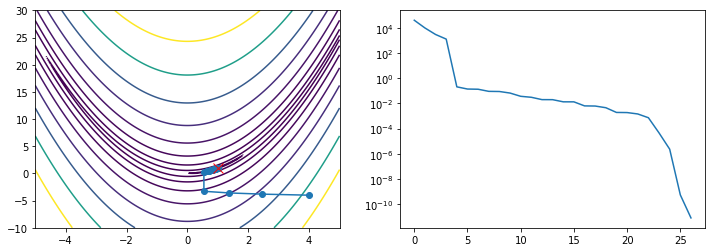

In [10]:
x = np.linspace(-5, 5, 300)
y = np.linspace(-10, 30, 300)
X, Y = np.meshgrid(x, y)
Z = rosen(np.vstack([X.ravel(), Y.ravel()])).reshape((300,300))
ps = np.array(ps)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.contour(X, Y, Z, np.arange(10)**5)
plt.plot(ps[:, 0], ps[:, 1], '-o')
plt.plot(1, 1, color='red', marker='x', markersize=10)
plt.subplot(122)
plt.semilogy(range(len(ps)), rosen(ps.T));

## Вывод:

По ходу данной зачётной работы,мы, путём эксперементального решения, проинициализировали скорость и точность вычисления метода Хука-Дживса,а так же эксперементально сравнили его с методами первого и второго порядка.


В ходе данного эксперемента, мы установили, что метод Хука-Дживса является средним(по показателям) методом, для нахождения минимума многомерной функции. Самым худшим показал себя метод градиентного спуска, выполнив большее кол-во итераций с меньшей точностью. А лучшим оказался метод Ньютона, который за 26(!) итераций смог показать более точный результат.

## Литература,которая использовалась в ходе данной работы:

https://intuit.ru/studies/courses/1020/188/lecture/4931?page=1

https://studyport.ru/referaty/tochnyje-nauki/3797-metody-huka-dzhivsa

https://www.youtube.com/watch?v=UyO4DbN5jtk&list=PLwlLzg6K8Nphjqca1mUc_3ZXx6EyLwS7A&index=23

https://www.youtube.com/watch?v=JJ4d2oUcQ14&list=PLwlLzg6K8Nphjqca1mUc_3ZXx6EyLwS7A&index=21

https://pnu.edu.ru/media/filer_public/2013/02/26/popova_methods-mo.pdf